In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#logical ml imports
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [17]:
data_url = "https://raw.githubusercontent.com/digipodium/Datasets/main/carsspeed.csv"
df = pd.read_csv(data_url, index_col=0)
df.head()

,speed,dist
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16


In [18]:
df.shape

(50, 2)

here we use scatter plot

<AxesSubplot:xlabel='speed', ylabel='dist'>

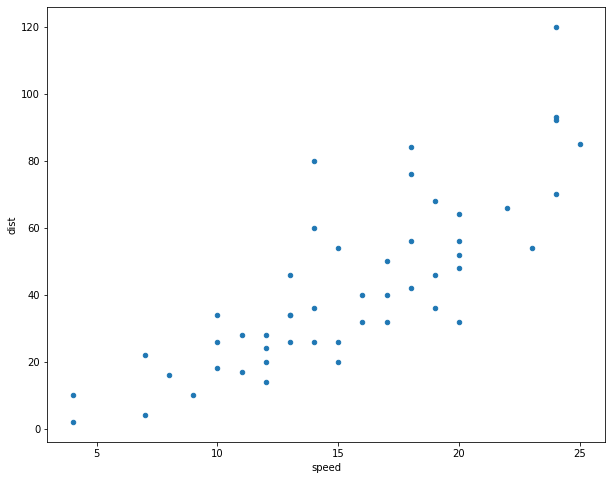

In [19]:
df.plot(x='speed',y='dist',kind='scatter',figsize=(10,8))


mean square error(mse)
********************* 
1. load data
2. store features in x  as 2d 
3. output in y 1d
4. split the data into 
. train(70-80)%
.test(30-20)%
###create  linear regressor object 
fit the object in traing data
get the accuracey  using test data 
check prediction
create graph ###
***********************************

In [20]:
#step 2 
x=df[['speed']]
y=df['dist']

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=1)

In [22]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()#no parameter rquried
reg.fit(xtrain,ytrain) #traing the algo

LinearRegression()

In [23]:
score=reg.score(xtest,ytest) * 100
print(f'the score is {score}% for our model')

the score is 61.5910985813624% for our model


In [24]:
reg.predict(xtest)

array([45.70503026, 57.07654529, 60.8670503 , 60.8670503 , 11.59048517,
       11.59048517, 76.02907034, 49.49553527, 76.02907034, 53.28604028])

In [25]:
df['prediction']=reg.predict(x)
df.head()


,speed,dist,prediction
1,4,2,0.218970
2,4,10,0.218970
3,7,4,11.590485
4,7,22,11.590485
5,8,16,15.380990


<AxesSubplot:xlabel='speed', ylabel='dist'>

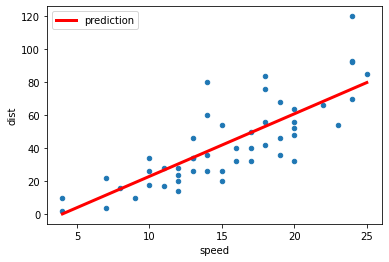

In [26]:
#for over lapping the graph and prection graph make ensure the vaue given by the data sets
ax=df.plot(kind='scatter',x='speed',y='dist')
df.plot(x='speed',y='prediction',ax=ax,color='red',linewidth=3)


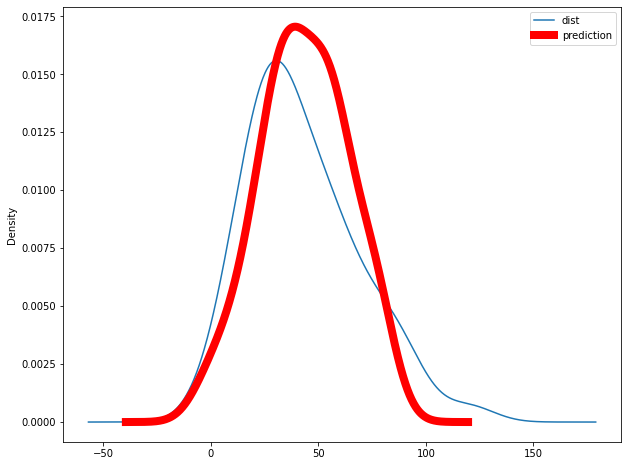

In [27]:
ax=df.plot(kind='kde',x='speed',y='dist',figsize=(10,8))
df.plot(kind='kde',x='speed',y='prediction',ax=ax,color='red',alpha=1,linewidth=8)#alpha use for tranprancey
plt.show()

*************************************************MATRICS:FOR MODEL EVALUATION*************************
R-squared Value 

In [28]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [29]:
r2_score(df.dist,df.prediction)

0.6499193875395108

In [30]:
mean_absolute_error(df.dist,df.prediction)

11.579285643417004

In [33]:
mean_squared_error(df.dist,df.prediction)

227.8253209447922

model saving

In [36]:
from joblib import dump #for dumpuing the data the feild

In [37]:
dump(reg,"faltu_model_v1.pkl")

['faltu_model_v1.pkl']

In [40]:
#del reg
del x

#loading model

In [41]:
from  joblib import load

In [43]:
reg=load("faltu_model_v1.pkl")

In [44]:
reg.predict([[24],[54]])

C:\Users\DELL\miniconda3\envs\digi12\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 76.02907034, 189.74422066])